# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [6]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
load_dotenv()

True

In [4]:
# Read your api key environment variable
newsapi_key = os.getenv("NEWS_API_KEY")

In [7]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=newsapi_key)

In [8]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin', language='en', page_size=100, sort_by='relevancy')

In [12]:
btc_articles['articles'][0]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Richard Lawler',
 'title': 'A fake press release claiming Kroger accepts crypto reached the retailer’s own webpage',
 'description': 'A crypto hoax claimed Kroger is accepting Bitcoin Cash. The fake press release was similar to one targeting Walmart earlier this year. The retailer quickly confirmed it’s fake, but not before the cryptocurrency’s price spiked by $30.',
 'url': 'https://www.theverge.com/2021/11/5/22765098/kroger-bitcoin-cash-cryptocurrency-hoax-pump-dump',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--mWg1kfPmspvfzY=/0x358:5000x2976/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22988084/1234440443.jpg',
 'publishedAt': '2021-11-05T13:32:14Z',
 'content': 'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]'}

In [9]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum', language='en', page_size=100, sort_by='relevancy')

In [13]:
def create_sentiment_df(articles):
    sentiments = []
    for article in articles["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu

            })
        except AttributeError:
            pass
        
    article_df = pd.DataFrame(sentiments)

    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    final_df = article_df[cols]
    
    return final_df

In [14]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = create_sentiment_df(btc_articles)

In [15]:
btc_sentiments.head()

,date,text,compound,positive,negative,neutral
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
2,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000
3,2021-10-21,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000
4,2021-10-20,A representation of the virtual cryptocurrency...,0.0000,0.000,0.000,1.000


In [16]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = create_sentiment_df(eth_articles)

In [17]:
eth_sentiments.head()

,date,text,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903


In [18]:
# Describe the Bitcoin Sentiment
btc_sentiments.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.102386,0.044570,0.022140,0.933300
std,0.341340,0.061158,0.046056,0.073012
min,-0.790600,0.000000,0.000000,0.659000
25%,0.000000,0.000000,0.000000,0.893750
50%,0.000000,0.000000,0.000000,0.936500
75%,0.386825,0.079000,0.010250,1.000000
max,0.807400,0.243000,0.280000,1.000000


In [19]:
# Describe the Ethereum Sentiment
eth_sentiments.describe()

,compound,positive,negative,neutral
count,100.000000,100.00000,100.000000,100.000000
mean,0.221510,0.07255,0.021700,0.905760
std,0.345964,0.06704,0.045488,0.078387
min,-0.659700,0.00000,0.000000,0.660000
25%,0.000000,0.00000,0.000000,0.850000
50%,0.171200,0.07250,0.000000,0.911500
75%,0.514625,0.11875,0.000000,1.000000
max,0.822500,0.24300,0.209000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the higest mean positive score of 0.07

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score 0f 0.82

Q. Which coin had the highest positive score?

A: Both coins have the same positive score of 0.24

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [22]:
# Instantiate the lemmatizer
lemitizer = WordNetLemmatizer()
# Create a list of stopwords
sw = set(stopwords.words("english"))

# Expand the default stopwords list if necessary
sw_custom = set(['today', 'said', 'also', 'could', 'found', 'basicly', 'sent', 'week' ])

all_stopwords = sw.union(sw_custom)
print(all_stopwords)

{'out', 'do', 'with', 'of', 'between', 'then', 'couldn', "mustn't", 'today', 'yourselves', 'them', "mightn't", 'up', 'yours', 'further', 'y', 'are', 'before', 'mustn', 'all', 'her', 'own', 'about', 'd', 'hadn', 'here', 'once', 'if', 'why', 'at', 'himself', 'just', 'whom', 'this', 'found', 'he', 'on', 'but', 'over', 'me', "aren't", "shouldn't", 'more', 'itself', 'its', 't', 'against', 'who', 'below', 'as', 'our', 'and', 'than', 'm', "couldn't", 'shouldn', 'also', 'didn', 'which', 'during', "should've", 'doing', 'through', 'under', 'ours', 'down', 'above', 'haven', 'weren', 'don', 'hers', 'wasn', 'those', 'until', 'or', 'a', 'other', 'no', 'i', 'week', 'isn', 'been', 's', 'how', 'can', 'theirs', 'when', "shan't", "that'll", 'so', 'hasn', "haven't", 'does', 'yourself', 'said', 'an', 'your', 'they', 'few', 'after', "didn't", 'had', 'both', 'each', "don't", 'aren', 'did', "doesn't", 'being', 'some', 'mightn', 'wouldn', 'were', 'off', 'll', 'o', 'themselves', "you're", 'not', "hasn't", 'has'

In [27]:
# Complete the tokenizer function
def tokenizer(text, stopwords=all_stopwords):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
   
    # Create a tokenized list of the words
    re_clean = regex.sub('', text)
    re_words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lematized_words = [lemitizer.lemmatize(word) for word in re_words]
   
    # Convert the words to lowercase
    lower_case_words = [word.lower() for word in lematized_words]
    
    # Remove the stop words
    tokens = [word for word in lower_case_words if word not in stopwords]
    
    return tokens

In [28]:
# Create a new tokens column for Bitcoin
btc_sentiments['tokens'] = btc_sentiments['text'].apply(tokenizer)

In [29]:
btc_sentiments.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[theres, big, new, presence, slurping, power, ..."
2,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000,"[talk, democratizing, finance, vast, majority,..."
3,2021-10-21,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000,"[representation, cryptocurrency, bitcoin, plac..."
4,2021-10-20,A representation of the virtual cryptocurrency...,0.0000,0.000,0.000,1.000,"[representation, virtual, cryptocurrency, bitc..."


In [30]:
# Create a new tokens column for Ethereum
eth_sentiments['tokens'] = eth_sentiments['text'].apply(tokenizer)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [31]:
from collections import Counter
from nltk import ngrams

In [40]:
btc_sentiments['tokens'][0]

['similar',
 'hoax',
 'earlier',
 'year',
 'tied',
 'walmart',
 'litecoinif',
 'buy',
 'something',
 'verge',
 'link',
 'vox',
 'media',
 'may',
 'earn',
 'commission',
 'see',
 'ethic',
 'statementphoto',
 'illustration',
 'thiago',
 'prudencios',
 'char']

In [42]:
btc_word_list = []
i = 0
while i < len(btc_sentiments['tokens']):
    j=0
    while j < len(btc_sentiments['tokens'][i]):
        btc_word_list.append(btc_sentiments['tokens'][i][j])
        j+=1
    i+=1

In [44]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams = Counter(ngrams(btc_word_list, n=2))

In [45]:
print(btc_ngrams)

Counter({('oct', 'reuters'): 14, ('char', 'bitcoin'): 14, ('exchangetraded', 'fund'): 13, ('new', 'york'): 12, ('illustration', 'taken'): 10, ('reuters', 'bitcoin'): 9, ('char', 'representation'): 8, ('representation', 'virtual'): 8, ('virtual', 'cryptocurrency'): 8, ('picture', 'illustration'): 8, ('cryptocurrency', 'bitcoin'): 7, ('bitcoin', 'seen'): 7, ('char', 'reuters'): 7, ('bitcoin', 'future'): 7, ('char', 'posted'): 6, ('via', 'getty'): 6, ('seen', 'picture'): 5, ('taken', 'october'): 5, ('october', 'reutersedgar'): 5, ('record', 'high'): 5, ('mayor', 'francis'): 5, ('francis', 'suarez'): 5, ('taken', 'june'): 4, ('bitcoin', 'fell'): 4, ('first', 'us'): 4, ('us', 'bitcoin'): 4, ('fund', 'etf'): 4, ('founder', 'ceo'): 4, ('ha', 'overtaken'): 3, ('overtaken', 'china'): 3, ('bitcoin', 'mining'): 3, ('kong', 'oct'): 3, ('bitcoin', 'futuresbased'): 3, ('bitcoin', 'hit'): 3, ('securities', 'exchange'): 3, ('exchange', 'commission'): 3, ('wa', 'trading'): 3, ('first', 'time'): 3, ('us

In [46]:
eth_word_list = []
i = 0
while i < len(eth_sentiments['tokens']):
    j=0
    while j < len(eth_sentiments['tokens'][i]):
        eth_word_list.append(eth_sentiments['tokens'][i][j])
        j+=1
    i+=1

In [47]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = Counter(ngrams(eth_word_list, n=2))

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [48]:
# Use token_count to get the top 10 words for Bitcoin
btc_most_common = btc_ngrams.most_common(10)

In [49]:
btc_most_common

[(('oct', 'reuters'), 14),
 (('char', 'bitcoin'), 14),
 (('exchangetraded', 'fund'), 13),
 (('new', 'york'), 12),
 (('illustration', 'taken'), 10),
 (('reuters', 'bitcoin'), 9),
 (('char', 'representation'), 8),
 (('representation', 'virtual'), 8),
 (('virtual', 'cryptocurrency'), 8),
 (('picture', 'illustration'), 8)]

In [50]:
# Use token_count to get the top 10 words for Ethereum
eth_most_common = eth_ngrams.most_common(10)

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [53]:
# Generate the Bitcoin word cloud
btc_wordcloud = WordCloud().generate(str(btc_word_list))

In [54]:
# Generate the Ethereum word cloud
eth_wordcloud = WordCloud().generate(str(eth_word_list))

(-0.5, 399.5, 199.5, -0.5)

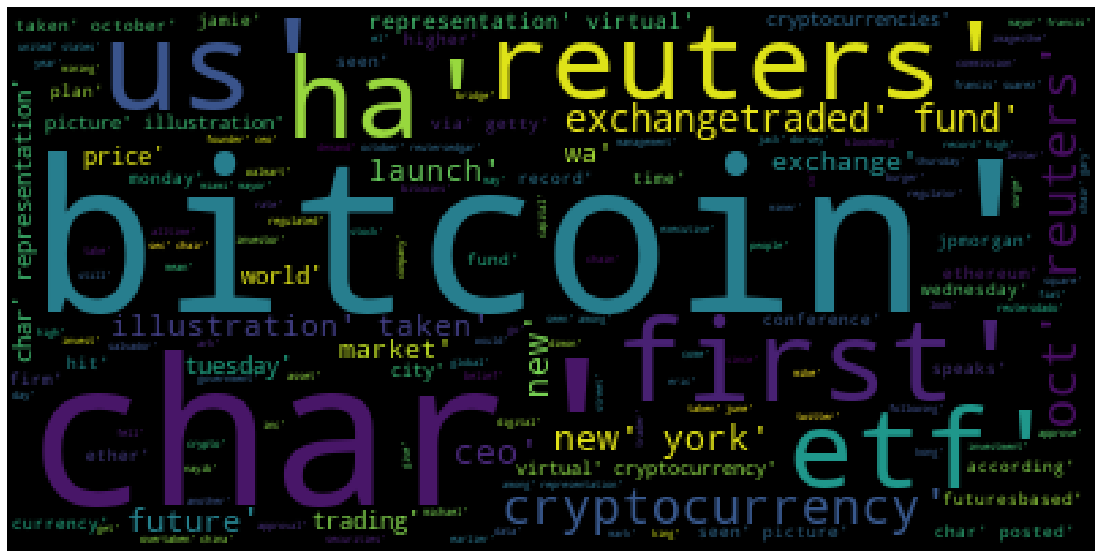

In [56]:
plt.imshow(btc_wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

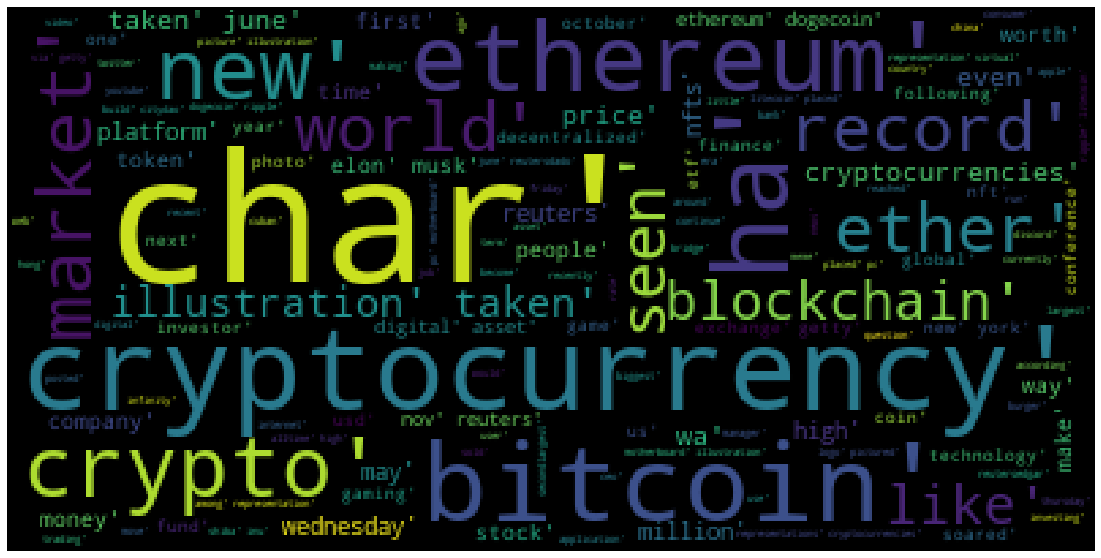

In [57]:
plt.imshow(eth_wordcloud)
plt.axis("off")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [58]:
import spacy
from spacy import displacy

In [59]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
# YOUR CODE HERE!

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---